<a href="https://colab.research.google.com/github/chatterjeerajdeep/explore-machine-learning/blob/main/EDA_for_insurance_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("/content/insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
print("data dimensions:: ", data.shape)

data dimensions::  (1338, 7)


In [5]:
print("missing values? ")
data.isnull().sum()

missing values? 


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

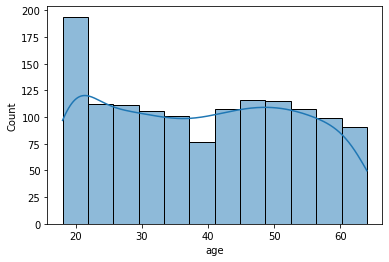

In [7]:
sns.histplot(data['age'], kde=True)

The maximum number of observations in the data has an age less than 25 years and the frequency keeps decreasing as age increases. This can be explained from the fact that people tend to buy insurance at their early age when they start earning. This is a safety measure and a natural human tendency. But the frequency keeps decreasing in the mid-ages and in the later ages. Why is it so?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


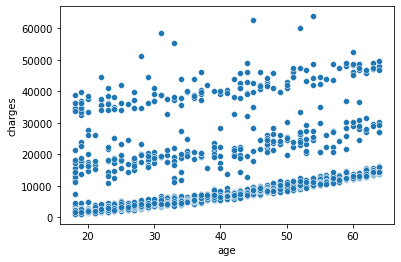

In [10]:
sns.scatterplot(data['age'],data['charges'])

One clear observation here is that for the same age group, there are 3 distinct stacks of prices. That means there are some decisive factors other than age which brings the major difference in price. What can be that factor?

The increase in age has a linear and increasing trend in price

Can this be a satisfactory explanation to why people tend to stay away from insurance with increasing age?


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


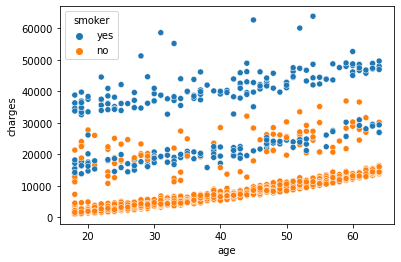

In [13]:
sns.scatterplot(data['age'],data['charges'], hue=data['smoker'])

This plot has one portion which is totally explanable. For every age group, the non-smoking category pay the lowest insurance charges. The smoking category pays the highest insurance charges.
But the middle stack of prices are kind of like a mix of smokers and non-smokers. 

This means smoking status does affect the prices for all each group.

But there has to be something else too which is a key player here.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


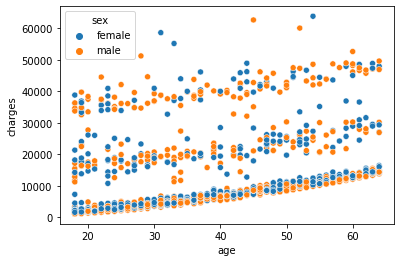

In [14]:
sns.scatterplot(data['age'],data['charges'], hue=data['sex'])

As expected, sex does not matter. In an gender neutral system of insurance, sex should not be a factor in deciding the insurance price. 

But there is one point here. There are certain diseases that are more likely to happen in males than in females and vice-versa. Now, there is no information that the insurance we are talking here is a medical insurance. It may be a life insurance, in which sex rarely matters. Had it been a medical insurance, sex could be a major factor given medical history etc.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


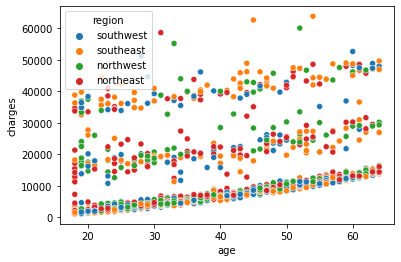

In [15]:
sns.scatterplot(data['age'],data['charges'], hue=data['region'])

Once again, this meets my expectations. Region has nothing to do in determining the charges. 

Interestingly, region may have been an important feature in the context of a pandemic as we are facing now. Something like a region having greater population may be more prone to deaths and could have affected the insurance price. 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


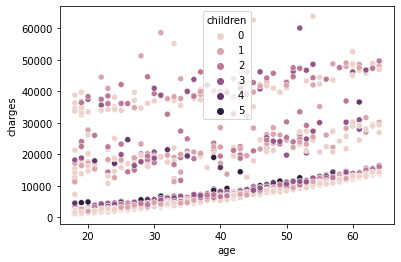

In [16]:
sns.scatterplot(data['age'],data['charges'], hue=data['children'])

What can be interpreted from here, is that the non-smoking category pays higher insurance prices for having more children. But, that is not exactly true for the middle and the topmost stack. 

So, the only feature that we are left with is bmi. bmi is not a categorical data, it is a continuous data. We may try to categorise the data by creating bins for the data.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


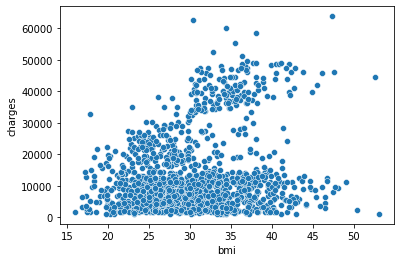

In [18]:
sns.scatterplot(data['bmi'],data['charges'])

This is the data for bmi as obtained from National Heart, Lung, and Blood Institute

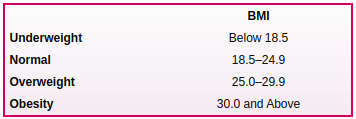

What we could expect was a rise in the insurance prices with increase in the bmi (because the chances of diseases increase). But interestingly, that is not the trend. There has to be a factor along with bmi that can contribute to the explanation of the price

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


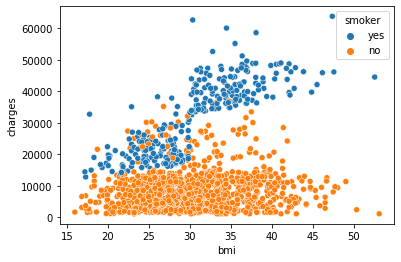

In [20]:
sns.scatterplot(data['bmi'],data['charges'], hue=data["smoker"])

This really helps. So even if a person is having a high bmi, if that person is a non-smoker, the insurance price is on the lower side. Whereas there is a linearly increasing trend in price with the increase in bmi for smokers.

This also indicates, that the middle and the topmost stack of prices corresponding to the variation in the age, can be possibily explained with the bmi information.

Based on the knowledge we have obtained, let's try to convert the bmi values into categorical data

In [26]:
# create a copy
data_mod = data.copy()

# apply conditions
data_mod["bmi"].loc[(data["bmi"] < 18.5)] = "underweight"
data_mod["bmi"].loc[(data["bmi"] >= 18.5) & (data["bmi"] <= 24.9)] = "normal"
data_mod["bmi"].loc[(data["bmi"] > 24.9) & (data["bmi"] <= 29.9)] = "overweight"
data_mod["bmi"].loc[(data["bmi"] > 29.9)] = "obese" 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

In [30]:
data_mod.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,overweight,0,yes,southwest,16884.92400
1,18,male,obese,1,no,southeast,1725.55230
2,28,male,obese,3,no,southeast,4449.46200
3,33,male,normal,0,no,northwest,21984.47061
4,32,male,overweight,0,no,northwest,3866.85520


In [31]:
np.unique(data_mod["bmi"])

array(['normal', 'obese', 'overweight', 'underweight'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


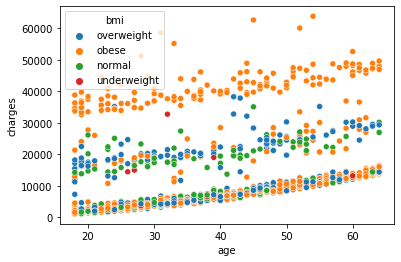

In [32]:
sns.scatterplot(data['age'],data['charges'], hue=data_mod['bmi'])

Now, we are in a position to explain the trend. 

So, the lower most stack actually corresponds to the non-smoking section. As we have seen all through out, for the non-smoking category, nothing else matters much except the number of children. We can clearly see there is a mix of bmi categories in the lower most stack. However, the prices here tend to go up with the increase in the number of children.

The top most stack correspond to the smoking category. The ones who smoke and are obese, pay the highest prices for insurance. Here, the number of children hardly matters.

The middle stack is actually a mix of every factor - age, bmi as well as smoking.

**Next, we can move on to build a regression model to predict the insurance prices.**



